In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
# Mapa iteractivo
import folium
from folium.plugins import HeatMap
from branca.colormap import LinearColormap

In [90]:
# Theme catpuccinMocha
catppuccin_mocha = [
    "#F5E0DC", "#F2CDCD", "#F5C2E7",
    "#CBA6F7", "#89B4FA", "#74C7EC",
    "#89DCEB", "#A6E3A1", "#F9E2AF",
    "#FAB387"
]
ROSEWATER, FLAMINGO, PINK, MAUVE, SAPPHIRE, BLUE, SKY, GREEN, YELLOW, PEACH = catppuccin_mocha

# Theme accents for white background
BG_LIGHT   = "#FFFFFF"
GRID_LIGHT = "#E3E8EF"
TEXT_DARK  = "#1E1E2E"  # very dark, almost black
BAR_COLOR  = SAPPHIRE
EDGE_COLOR = "#313244"

# Apply Seaborn theme
sns.set_theme(
    style="whitegrid",
    rc={
        "figure.facecolor": BG_LIGHT,
        "axes.facecolor":   BG_LIGHT,
        "axes.edgecolor":   TEXT_DARK,
        "axes.labelcolor":  TEXT_DARK,
        "xtick.color":      TEXT_DARK,
        "ytick.color":      TEXT_DARK,
        "grid.color":       GRID_LIGHT,
        "text.color":       TEXT_DARK,
        "figure.edgecolor": BG_LIGHT,
    }
)

# Paletes
cmap = sns.blend_palette(catppuccin_mocha, n_colors=12, as_cmap=True)
Rp   = sns.blend_palette(catppuccin_mocha, 12)

cmap
Rp

[(0.9607843137254902, 0.8784313725490196, 0.8627450980392157),
 (0.9512341407151096, 0.8179469434832757, 0.8149942329873126),
 (0.9563552479815456, 0.7770242214532872, 0.8674971164936564),
 (0.8890888119953864, 0.7129873125720876, 0.933194925028835),
 (0.7229988465974625, 0.666482122260669, 0.9719492502883507),
 (0.5295040369088811, 0.7128950403690889, 0.9752249134948097),
 (0.46265282583621686, 0.7733794694348327, 0.9306574394463668),
 (0.514002306805075, 0.8394925028835064, 0.9226758938869666),
 (0.6014763552479816, 0.8782468281430219, 0.7576931949250287),
 (0.7735178777393312, 0.888719723183391, 0.6520415224913495),
 (0.9772087658592848, 0.8515801614763552, 0.6567474048442906),
 (0.9803921568627451, 0.7019607843137254, 0.5294117647058824)]

In [91]:
# Archivos:
!find /kaggle/input -maxdepth 2 | sed 's/^/📂 /'

📂 /kaggle/input
📂 /kaggle/input/airbnb-prices-in-cdmx-2024
📂 /kaggle/input/airbnb-prices-in-cdmx-2024/aribnb_cdmx_2024_data.csv


In [92]:
# Load the CSV
DATA_PATH = '/kaggle/input/airbnb-prices-in-cdmx-2024/aribnb_cdmx_2024_data.csv'
df = pd.read_csv(DATA_PATH)

# Sanitizamos
df['price'] = df['price'].replace([np.inf, -np.inf], np.nan)
df = df[df['price'].notna()]

# test
print("Rows:", df.shape[0], "Columns:", df.shape[1])
df.head()

Rows: 23640 Columns: 39


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,density_university,density_subway,density_restaurant,dis_to_tourist_point_per_neighborhood,cluster_geo,price_per_cluster,disponibility_cat,disponibility_per_review,min_nights_cat,average_measure
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,...,0.000000,0.000000,0.000000,8.659602,15,1454.504348,high,0,shor_term,150-250 m²
1,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,2029.0,2,...,0.000000,0.000000,0.000000,3.895025,8,1775.377953,high,15925,shor_term,90-150 m²
2,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Coyoacán,19.35614,-99.16308,Entire home/apt,1140.0,5,...,1.029412,0.698529,0.220588,0.140610,11,1029.543619,high,32639,shor_term,40-60 m²
3,107078,NEW DESIGNER LOFT,540705,Andrea,Miguel Hidalgo,19.43211,-99.19327,Entire home/apt,3633.0,1,...,0.000000,0.000000,0.000000,1.778827,9,1883.109571,high,3025,shor_term,250-400 m²
4,165772,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,790208,Francisco Carlos,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3671.0,2,...,0.000000,0.299145,0.128205,1.458166,8,1775.377953,high,82110,shor_term,250-400 m²


In [93]:
# Info about data
df.info()

# % missing
missing = df.isna().mean() * 100
missing.sort_values(ascending=False).head(10).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23640 entries, 0 to 23639
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     23640 non-null  int64  
 1   name                                   23640 non-null  object 
 2   host_id                                23640 non-null  int64  
 3   host_name                              23640 non-null  object 
 4   neighbourhood                          23640 non-null  object 
 5   latitude                               23640 non-null  float64
 6   longitude                              23640 non-null  float64
 7   room_type                              23640 non-null  object 
 8   price                                  23640 non-null  float64
 9   minimum_nights                         23640 non-null  int64  
 10  number_of_reviews                      23640 non-null  int64  
 11  ca

disponibility_cat         1.15
id                        0.00
density_university        0.00
demand_index              0.00
income_per_month          0.00
average_cost_of_living    0.00
neighbourhood_area        0.00
density_hospital          0.00
density_supermarket       0.00
density_park              0.00
dtype: float64

In [94]:
# Numeric summary
df.describe().T[['count','mean','std','min','25%','50%','75%','max']]


,count,mean,std,min,25%,50%,75%,max
id,23640.0,5.564901e+17,4.890761e+17,35797.000000,4.166626e+07,7.052580e+17,1.005885e+18,1.252933e+18
host_id,23640.0,2.193070e+08,1.860953e+08,7365.000000,5.099606e+07,1.600891e+08,3.844177e+08,6.535037e+08
latitude,23640.0,1.940630e+01,4.171003e-02,19.177848,1.939388e+01,1.941561e+01,1.943213e+01,1.955338e+01
longitude,23640.0,-9.916622e+01,3.258585e-02,-99.339630,-9.917875e+01,-9.916752e+01,-9.915438e+01,-9.896645e+01
price,23640.0,1.430319e+03,1.909565e+03,50.000000,6.000000e+02,9.990000e+02,1.561000e+03,4.285700e+04
minimum_nights,23640.0,3.759729e+00,1.671320e+01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,7.300000e+02
number_of_reviews,23640.0,4.911933e+01,7.785995e+01,0.000000,4.000000e+00,1.900000e+01,6.200000e+01,1.282000e+03
calculated_host_listings_count,23640.0,1.826041e+01,4.273460e+01,1.000000,1.000000e+00,4.000000e+00,1.200000e+01,2.580000e+02
availability_365,23640.0,2.391690e+02,1.139601e+02,0.000000,1.450000e+02,2.680000e+02,3.430000e+02,3.650000e+02
logarithmic_price,23640.0,6.925390e+00,7.575782e-01,3.931826,6.398595e+00,6.907755e+00,7.353722e+00,1.066565e+01


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


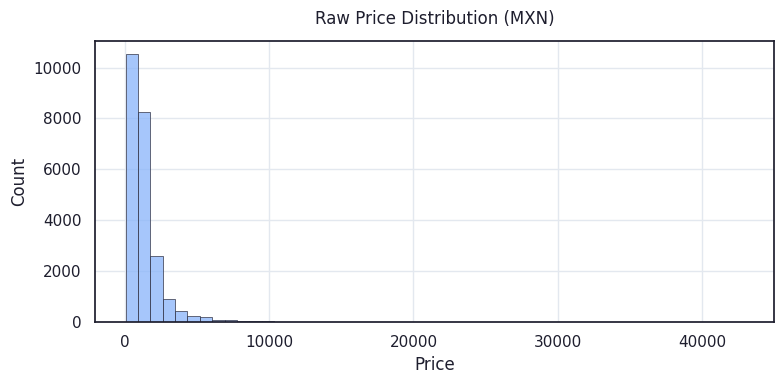

In [95]:
plt.figure(figsize=(8,4))
ax = sns.histplot(
    df['price'],
    bins=50,
    kde=False,
    color=BAR_COLOR,
    edgecolor=EDGE_COLOR,
    linewidth=0.5
)
ax.set_title("Raw Price Distribution (MXN)", color=TEXT_DARK, pad=12)
ax.set_xlabel("Price", color=TEXT_DARK)
ax.set_ylabel("Count", color=TEXT_DARK)

# Ensure all spines and tick labels are dark
for spine in ax.spines.values():
    spine.set_color(TEXT_DARK)
ax.tick_params(colors=TEXT_DARK)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


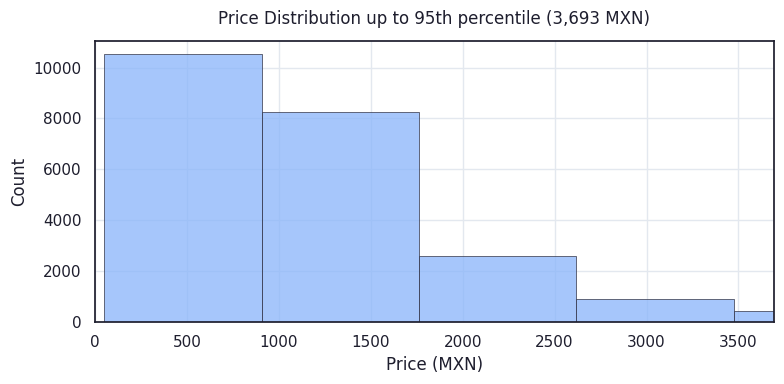

In [96]:
# No pasamos de 10,000 para la mayoria
p95 = df['price'].quantile(0.95)

plt.figure(figsize=(8,4))
ax = sns.histplot(
    df['price'],
    bins=50,
    kde=False,
    color=BAR_COLOR,
    edgecolor=EDGE_COLOR,
    linewidth=0.5
)

# Zoom the x-axis
ax.set_xlim(0, p95)

ax.set_title(f"Price Distribution up to 95th percentile ({int(p95):,} MXN)", color=TEXT_DARK, pad=12)
ax.set_xlabel("Price (MXN)", color=TEXT_DARK)
ax.set_ylabel("Count", color=TEXT_DARK)

for spine in ax.spines.values():
    spine.set_color(TEXT_DARK)
ax.tick_params(colors=TEXT_DARK)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


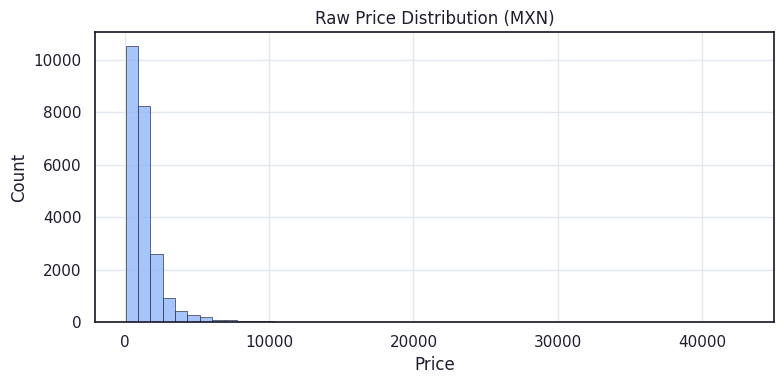

In [97]:
# Ver todos pero en escala log
plt.figure(figsize=(8,4))
sns.histplot(
    df['price'],
    bins=50,
    kde=False,
    color=BAR_COLOR,
    edgecolor=EDGE_COLOR,
    linewidth=0.5
)
plt.title("Raw Price Distribution (MXN)", color=TEXT_DARK)
plt.xlabel("Price", color=TEXT_DARK)
plt.ylabel("Count", color=TEXT_DARK)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


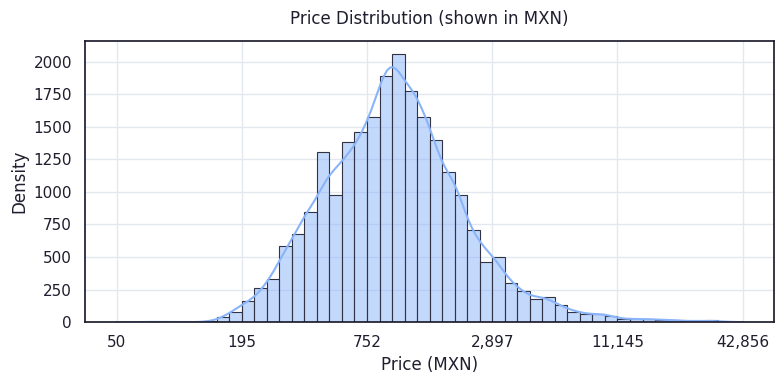

In [98]:
# Airbnb prices are typically right-skewed:
# many cheap listings and a few extremely expensive ones.
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(8,4))
ax = sns.histplot(
    df['log_price'],
    bins=50,
    kde=True,
    color=BAR_COLOR,
    edgecolor=EDGE_COLOR,
    linewidth=0.8
)

# Reetiquetando para mostrar los precios / exp = f^-1(log)
def price_formatter(x, pos):
    p = np.expm1(x)
    return f"{int(p):,}"

ax.xaxis.set_major_formatter(FuncFormatter(price_formatter))

# Seleccionamos unos representativos
ticks = np.linspace(df['log_price'].min(), df['log_price'].max(), 6)
ax.set_xticks(ticks)

# cappucinando xd
ax.set_title("Price Distribution (shown in MXN)", color=TEXT_DARK, pad=12)
ax.set_xlabel("Price (MXN)", color=TEXT_DARK)
ax.set_ylabel("Density", color=TEXT_DARK)
for spine in ax.spines.values(): spine.set_color(TEXT_DARK)
ax.tick_params(colors=TEXT_DARK)

plt.tight_layout()
plt.show()

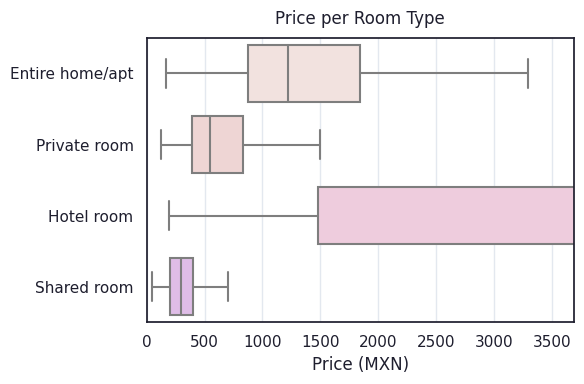

In [99]:
# boxplot de precios segun categoworia
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    y='room_type',
    x='price',
    data=df,
    showfliers=False,
    palette=Rp
)

ax.set_title("Price per Room Type", color=TEXT_DARK, pad=10)
ax.set_xlabel("Price (MXN)", color=TEXT_DARK)
ax.set_ylabel("", color=TEXT_DARK)

# work with 95quantile
ax.set_xlim(0, df['price'].quantile(0.95))

# Catpuccinando
for spine in ax.spines.values():
    spine.set_color(TEXT_DARK)
ax.tick_params(colors=TEXT_DARK)

plt.tight_layout()
plt.show()


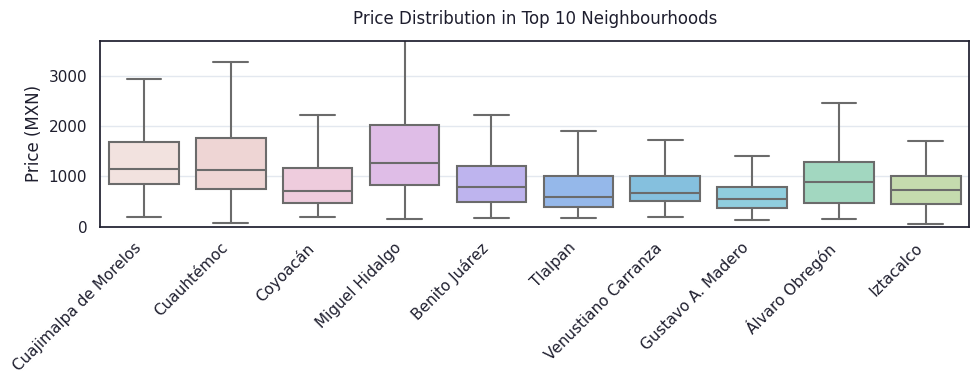

In [100]:
# Filtrado de los los mas barrios con mas listings
#
plt.figure(figsize=(10,4))
ax = sns.boxplot(
    x='neighbourhood',
    y='price',
    data=df[df['neighbourhood'].isin(top_n)],
    showfliers=False,
    palette=Rp
)

# rotando
plt.xticks(rotation=45, ha='right', color=TEXT_DARK)

ax.set_title("Price Distribution in Top 10 Neighbourhoods", color=TEXT_DARK, pad=12)
ax.set_xlabel("", color=TEXT_DARK)
ax.set_ylabel("Price (MXN)", color=TEXT_DARK)

# work with 95quantile
ax.set_ylim(0, df['price'].quantile(0.95))

# catpuccinando
for spine in ax.spines.values():
    spine.set_color(TEXT_DARK)
ax.tick_params(colors=TEXT_DARK)

plt.tight_layout()
plt.show()


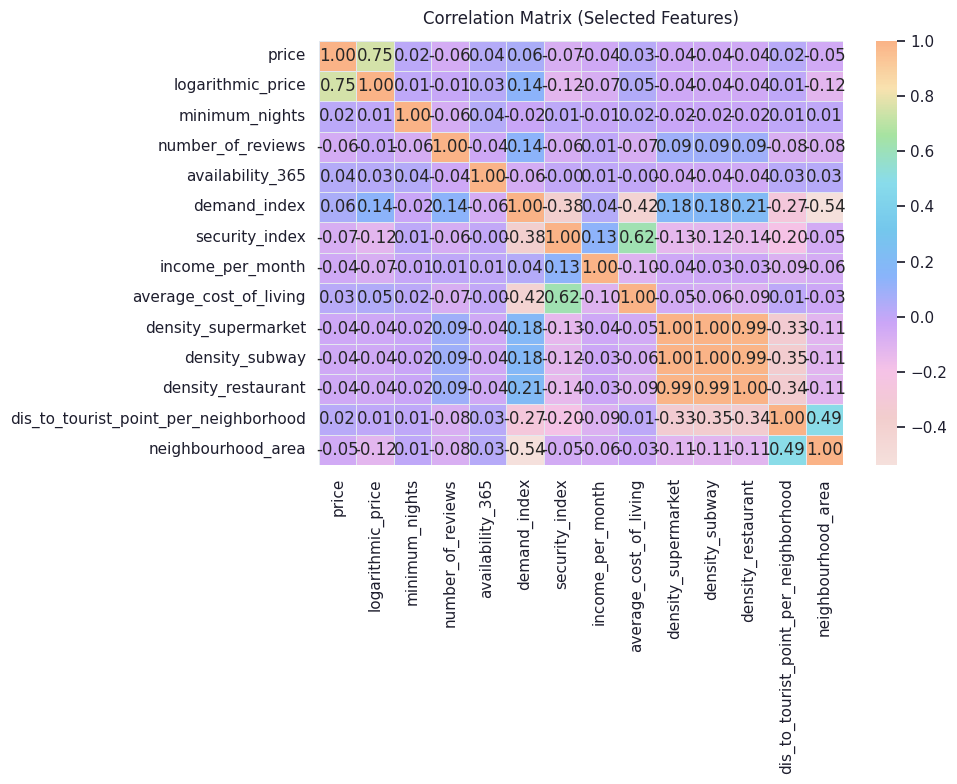

In [101]:
# Calculando las corelaciones
better_nums = [
    'price',
    'logarithmic_price',
    'minimum_nights',
    'number_of_reviews',
    'availability_365',
    'demand_index',
    'security_index',
    'income_per_month',
    'average_cost_of_living',
    'density_supermarket',
    'density_subway',
    'density_restaurant',
    'dis_to_tourist_point_per_neighborhood',
    'neighbourhood_area'
]

# 2. Compute the correlation matrix
corr2 = df[better_nums].corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr2,
    annot=True,
    fmt=".2f",
    cmap=cmap,# Ahora usando el catpuccinmap :)
    linewidths=0.5,
    linecolor=GRID_LIGHT
)
ax.set_title("Correlation Matrix (Selected Features)", color=TEXT_DARK, pad=12)

for spine in ax.spines.values():
    spine.set_color(TEXT_DARK)
ax.tick_params(colors=TEXT_DARK)

plt.tight_layout()
plt.show()


In [102]:
# Seleccionamos las mas relacionadas al precio
corr_with_price = corr2['price'].abs().sort_values(ascending=False)
top_feats = corr_with_price.index[1:6].tolist()
print("Top features correlated with price:", top_feats)


Top features correlated with price: ['logarithmic_price', 'security_index', 'demand_index', 'number_of_reviews', 'neighbourhood_area']


In [103]:
# Preparando datos para el modelo split 80/20
from sklearn.model_selection import train_test_split

X = df[top_feats]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 18912 Test size: 4728


In [104]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# PReficd
y_pred = model.predict(X_test)

# Metrics
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

metrics = {
    'MAE':  mae,
    'RMSE': rmse,
    'R2':   r2
}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

# resultados
display(metrics_df)

,Value
MAE,617.897973
RMSE,1213.306208
R2,0.572340


In [127]:
# Visualizacion de burbujas Bigger <=> expensive
colormap = LinearColormap(
    colors=catppuccin_mocha,
    vmin=df['price'].min(),
    vmax=df['price'].max(),
    caption='Price (MXN)'
)

min_r, max_r = 3, 15
prices = df['price']
radii = ((prices - prices.min()) / (prices.max() - prices.min())) * (max_r - min_r) + min_r

sample = df.sample(2000, random_state=1).copy()
sample['radius'] = radii.loc[sample.index]

m = folium.Map(location=[19.43, -99.13], zoom_start=11, tiles='CartoDB positron')

for _, row in sample.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['radius'],
        fill=True,
        fill_color=colormap(row['price']),
        color=None,
        fill_opacity=0.6,
        popup=f"Price: ${row['price']:,.0f}"
    ).add_to(m)

colormap.add_to(m)
m

In [107]:
# Centro aproximado de CDMX
m = folium.Map(location=[19.43, -99.13], zoom_start=11, tiles='CartoDB positron')

heat_data = df[['latitude','longitude','price']].sample(5000).values.tolist()
HeatMap(heat_data, radius=15, blur=20, max_val=df['price'].quantile(0.99)).add_to(m)
m.save('price_heatmap.html')
m


<ipython-input-107-5b05888ec450>:9: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=15, blur=20, max_val=df['price'].quantile(0.99)).add_to(m)


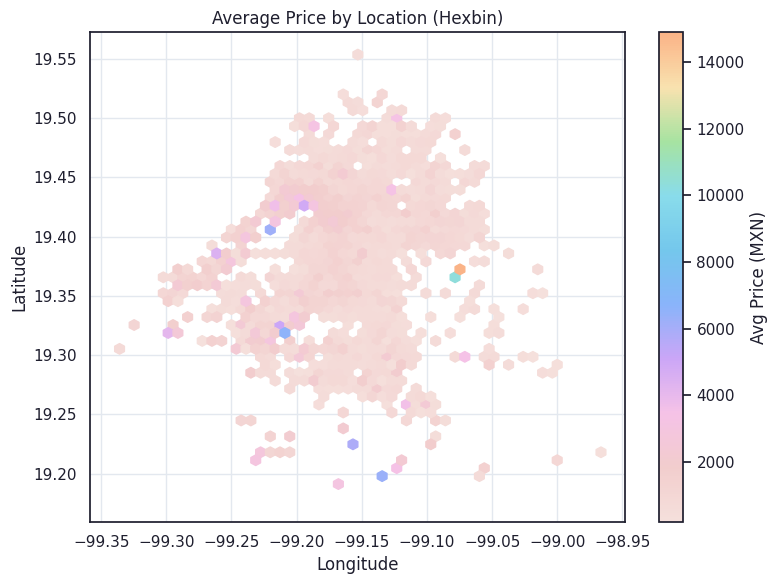

In [105]:
# Visualizando los precios en la ciudad
plt.figure(figsize=(8,6))
hb = plt.hexbin(
    x=df['longitude'], y=df['latitude'],
    C=df['price'],
    gridsize=50,
    reduce_C_function=np.mean,
    cmap=cmap,
    mincnt=1 # Cuantos datos minimos en los hexagowons
)
plt.colorbar(hb, label='Avg Price (MXN)')
plt.title("Average Price by Location (Hexbin)", color=TEXT_DARK)
plt.xlabel("Longitude", color=TEXT_DARK)
plt.ylabel("Latitude", color=TEXT_DARK)
for spine in plt.gca().spines.values(): spine.set_color(TEXT_DARK)
plt.tick_params(colors=TEXT_DARK)
plt.tight_layout()
plt.show()
